Until now, we haven't discussed standard methods to handle observations {$y_t, t = 1,..., n$} which exhibits discrepancies with stationary conditions. Straight off the bat, differencing is a simple yet powerful tool to transform non-stationary time series, which is applied by the model `ARIMA`(autoregressive-integrated moving average). Having the transformed data, the model fits a `ARMA` model afterwards with parameters `p` and `q`.

The polynomial representation for ARIMA is defined as:

$$ \phi (L)^p(1-L)^d y_t =  \theta(L)^q \epsilon_t, \quad \epsilon_t \sim WN(0, \sigma^2)$$ 


If d = 0, ARIMA responds as ARMA.       



Perhaps the foremost trait of `ARIMA` is the ability of modeling Trends mixed with cycles. Id `d` is greater than 0, the model can adjust a trend of degree `(d-1)`. 

---------------
#### Digging on transformations

Stationary process is an assumption for an ARMA model. When a series diverges from the stationarity, we can apply some transformation to smooth it. 

1. Log and Box-Cox.

When the homoscedasticity is infringed, due to a growing variance throughout series realization, a variance-stabilizing transformation may control and reshape it. The classical dataset International Airline Passenger Data epitomises perfectly this.

In [11]:
import pandas as pd
import seaborn as sns

data_passengers = pd.read_csv('airpassenger/AirPassengers.csv')
data_passengers['Month'] = pd.to_datetime(data_passengers['Month'])

<AxesSubplot: xlabel='Month', ylabel='#Passengers'>

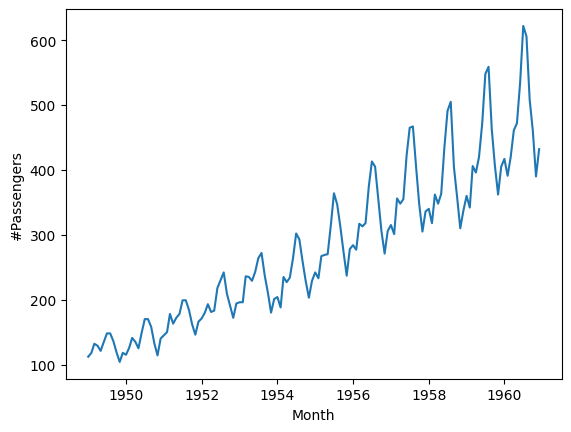

In [12]:
sns.lineplot(x='Month', y='#Passengers', data=data_passengers)

As the graph shows, the variance grows as the mean. A power-stabilizing transformer can manage the heteroscedasticity.

<AxesSubplot: xlabel='Month', ylabel='transformed_Passengers'>

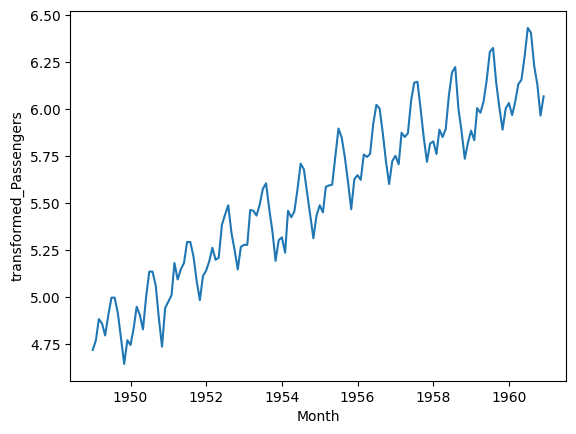

In [15]:
import numpy as np

data_passengers['transformed_Passengers'] = np.log(data_passengers['#Passengers'])

sns.lineplot(x='Month', y='transformed_Passengers', data=data_passengers)

2. Trend and seasonality decomposition.

And then, to have a stationary process, you must extirpe trend and seasonality, as previously mentioned.

(i) "classical decomposition".     
(ii) differencing.

Let's apply the native function diff() from pandas and check out the outcome.

<AxesSubplot: xlabel='Month', ylabel='diff_Passengers'>

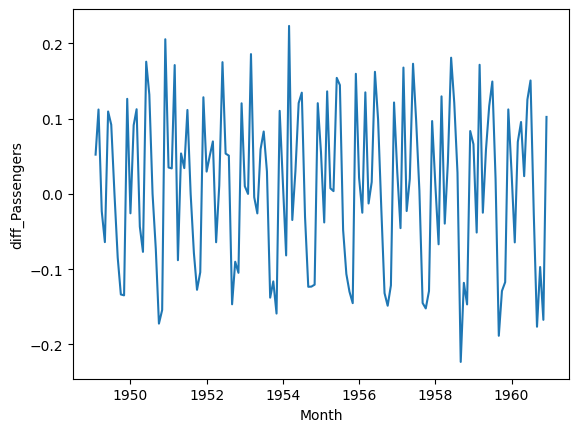

In [18]:
data_passengers['diff_Passengers'] = data_passengers['transformed_Passengers'].diff()
sns.lineplot(x='Month', y='diff_Passengers', data=data_passengers)

Now, it is a stationary stochastic process.

#### An ARIMA Model.

Let's analyze the results of an ARIMA fitted with tuple (p,d,q) as (1, 1, 1).

In [46]:
import statsmodels.api as sm
import pylab
import scipy.stats as stats

from statsmodels.tsa.arima.model import ARIMA

In [32]:
mdl = ARIMA(data_passengers['transformed_Passengers'], order=(1,1,1))

results = mdl.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     transformed_Passengers   No. Observations:                  144
Model:                     ARIMA(1, 1, 1)   Log Likelihood                 124.313
Date:                    Mon, 21 Nov 2022   AIC                           -242.626
Time:                            20:13:20   BIC                           -233.738
Sample:                                 0   HQIC                          -239.014
                                    - 144                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5773      0.164     -3.516      0.000      -0.899      -0.255
ma.L1          0.8478      0.098      8.685      0.000       0.656       1.039
sigma2         0.0103      0.002      5.992      0.000       0.007       0.014
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 5.94
Prob(Q):                              0.90   Prob(JB):                         0.05
Heteroskedasticity (H):               1.07   Skew:                             0.04
Prob(H) (two-sided):                  0.82   Kurtosis:                         2.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The graph below presents the qqplot of residuals. If the assumptions were propely accomplished, it shall look gaussian.

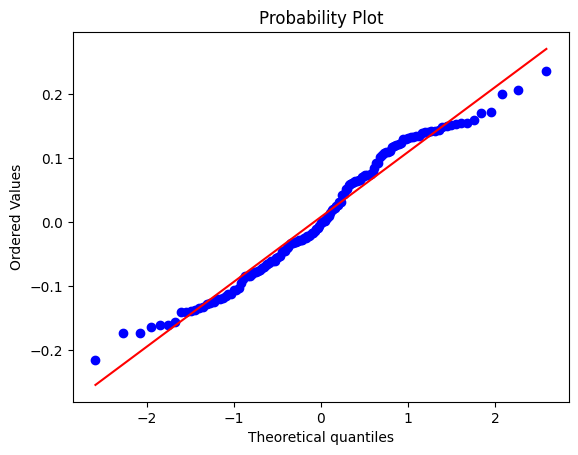

In [47]:
residuals = (data_passengers['transformed_Passengers'][1:] - results.fittedvalues[1:])

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

We can benchmark another values for (p, q) and pick the best option through `AIC` and `BIC` metrics.

#### SARIMA   

Seasonal series are strong serial correlation at the seasonal lag. In real life, it is expected that the seasonal component doesnt repeat itself thoroughly. Seasonal ARIMA models allow randomness in the seasonal pattern.

The SARIMA(p,d,q) x (P,D,Q)$_s$ process is specified as:

$$ \phi(L)^p \Phi(L)^P y_t = \theta(L)^q \Theta(L)^Q \epsilon, \quad \epsilon \sim WN(0, \sigma²);  $$
$$ y_t = (1 - L)^d (1 - L)^D x_t $$

Therefore, SARIMA composes two models: for the seasonal structure and between-seasonal structure, which crafts a complex structure for the covariance function.

Through AIC, BIC, and AICC is possible to assess model's quality. The h-step-ahead prediction are similar to ARIMA model.